In [2]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import seaborn

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
def generate_normal_time_series(num, minl=50, maxl=1000):
    data = np.array([], dtype=np.float64)
    partition = np.random.randint(minl, maxl, num)
    for p in partition:
        mean = np.random.randn()*10
        var = np.random.randn()*1
        if var < 0:
            var = var * -1
        tdata = np.random.normal(mean, var, p)
        data = np.concatenate((data, tdata))
    return data

In [4]:
data = generate_normal_time_series(7, 50, 200)


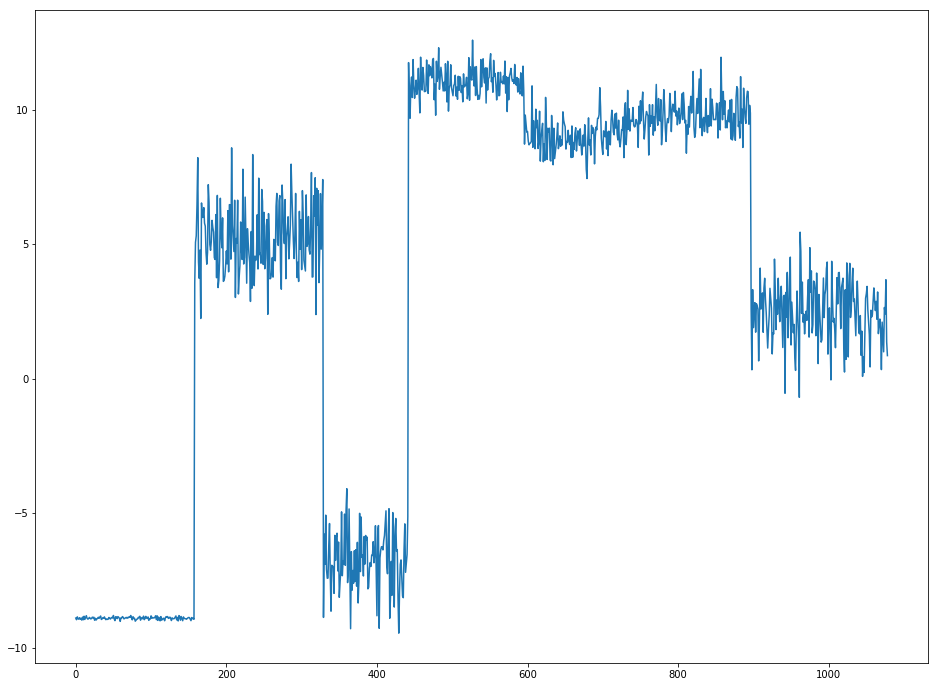

In [5]:
fig, ax = plt.subplots(figsize=[16, 12])
ax.plot(data)

In [6]:
import cProfile
import bayesian_changepoint_detection.offline_changepoint_detection as offcd
from functools import partial

Q, P, Pcp = offcd.offline_changepoint_detection(data, partial(offcd.const_prior, l=(len(data)+1)), offcd.gaussian_obs_log_likelihood, truncate=-40)


Use scipy logsumexp().


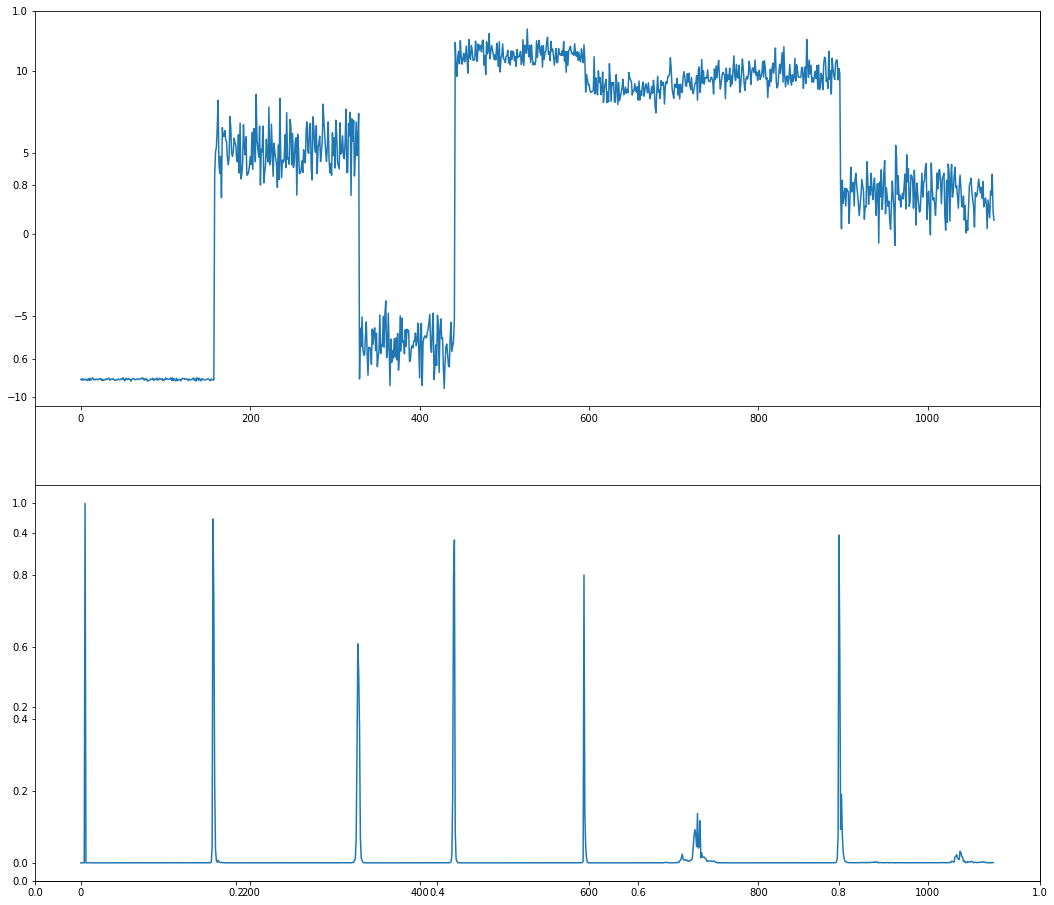

In [7]:
fig, ax = plt.subplots(figsize=[18, 16])
ax = fig.add_subplot(2, 1, 1)
ax.plot(data[:])
ax = fig.add_subplot(2, 1, 2, sharex=ax)
ax.plot(np.exp(Pcp).sum(0))